# Import Library

In [186]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read & Analyze Data

In [187]:
file_path = 'training_data.csv'
df = pd.read_csv(file_path)
df.head()

,size (square feet),number of bedrooms,price ($)
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


**Comment:** 3 attributes: size, number of bedrooms and price. We assume size and no. of bedrooms are independent variables, while price is dependent variable.

In [188]:
df.describe()

,size (square feet),number of bedrooms,price ($)
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


**Comment:** 
- The dataset is small (only 47 samples).
- The standard deviation for price and size are quite high, which means the data is well spread out.

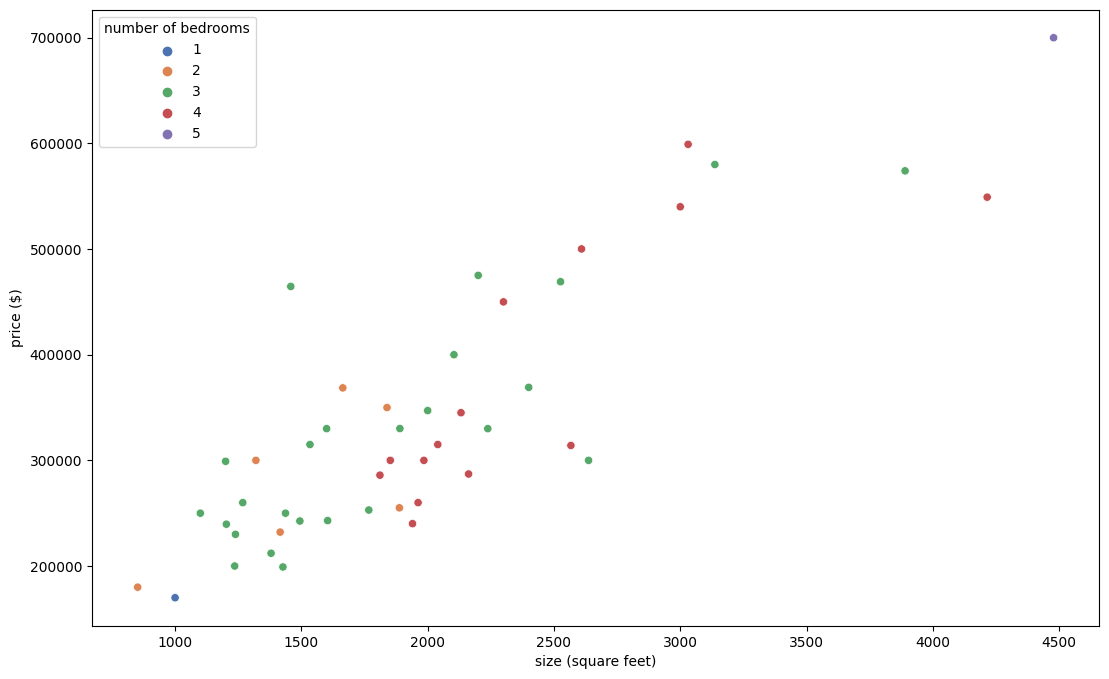

In [189]:
plt.figure(figsize=(13,8))
ax = sns.scatterplot(data=df, x='size (square feet)', y='price ($)', 
                     hue='number of bedrooms', palette='deep')
plt.show()

**Comment:**
- Most of the data points land on the bottom-left corner.
- Size and price are positively correlated, nice angle for linear regression.
- The chart looks nice...

# Helper Functions

In [190]:
def standardize_train_set(X):
    #todo
    mu = list(X[list(X.columns)].mean()) #mean
    #todo
    sigma = list(X[list(X.columns)].std()) #std
    #todo
    X_norm = []
    for i in range(len(X.columns)):
        X_norm.append((list(df[list(df.columns)[i]]) - df[list(df.columns)].mean()[i]) / df[list(df.columns)].std()[i])
    return X_norm, mu, sigma

In [191]:
def standardize_test_set(X, mu, sigma):
    #todo
    X_norm = []
    for i in range(len(X)):
        X_norm.append((X[i] - mu) / sigma)
    return X_norm

In [192]:
class LinearRegression:
	def __init__(self, alpha=0.001, iters=1000, verbose=False):
		self.alpha = alpha
		self.iters = iters
		self.verbose = verbose
		self.theta = None

	def calculate_absolute_error(self, X, y, theta):
		#todo
		m = len(y)

		h_theta = np.array(X).transpose() * np.array(theta)
		loss = h_theta - y

		loss = np.sum(abs(loss) / m)

	def gradient(self, X, y, theta):
		m = len(y)

		#todo
		h_theta = np.dot(np.array(X).transpose(), theta)
		loss = h_theta - y

		#todo
		dJ = (1/m) * np.dot(np.array(X), loss)
		J = 1/(2*m) * np.dot(np.array(loss).transpose(), loss) 

		return (J, dJ)

	def gradient_descent(self, X, y):
		X.insert(0, np.ones(len(X[0]),dtype='int64'))
		theta = np.zeros(len(X))
		print(f'The total of training sample: {len(y)}')
		for i in range(self.iters):
			#todo
			J, dJ = self.gradient(X, y, theta)
			#todo
			theta = theta - (self.alpha * dJ)
			if self.verbose:
				print(f'Iter {i + 1}, loss = {self.calculate_absolute_error(X, y, theta)}')
		return theta

	def fit(self, X, y):
		self.theta = self.gradient_descent(X, y)

	def predict(self, X):
		results = []
		for i in range(len(X)):
			#todo
			results.append(np.sum(np.insert(X[i], 0, 1) * self.theta))
			
		return results

# Main Function

## Train Model

In [193]:
#Load config
with open('config.json',) as f:
    configs = json.load(f)
#Feature-Label split
#todo
X = df[df.columns.drop(df.columns[-1])]
#todo
y = df[df.columns[-1]]
#Standardize feature and Train model
X, mu, sigma = standardize_train_set(X)
model = LinearRegression(alpha= configs['alpha'], iters=configs['iters'], verbose=False)
model.fit(X, y)

The total of training sample: 47


## Visualize Model

In [194]:
x_surf, y_surf = np.meshgrid(np.linspace(df['size (square feet)'].min(), df['size (square feet)'].max()),
                 np.linspace(df['number of bedrooms'].min(), df['number of bedrooms'].max()))

surf_df = pd.DataFrame({'size (square feet)': x_surf.ravel(), 'number of bedrooms': y_surf.ravel()})
predicted = np.array(model.predict(standardize_test_set(surf_df.values, mu, sigma)))

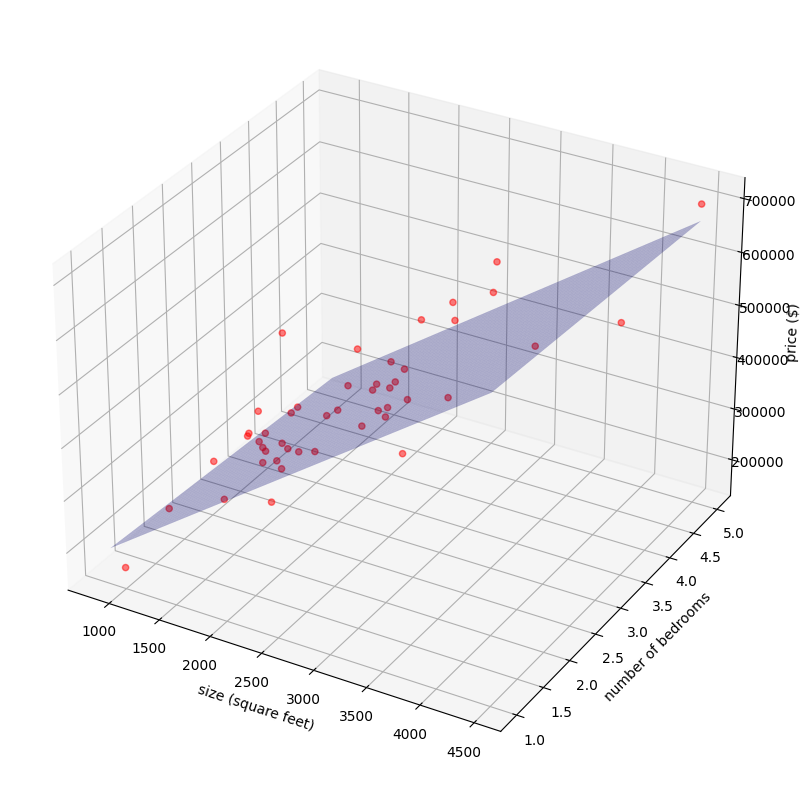

In [195]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['size (square feet)'], df['number of bedrooms']
           ,df['price ($)'], c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, predicted.reshape(x_surf.shape), color='b', alpha=0.3)

ax.set_xlabel('size (square feet)')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price ($)')
plt.show()

**Comment:** It should be right... 

## Predict Sample

In [196]:
sample = [1650, 3]
#todo
surf_df.loc[len(surf_df)] = sample
y_predict = model.predict(standardize_test_set(surf_df.values, mu, sigma))
print(f'House price expected is {round(y_predict[len(surf_df) - 1])}$')

House price expected is 293237$


## Save Results

In [197]:
#Save model
with open('model.json', 'w') as f:
    #todo
    json.dump({'theta: ': list(model.theta)}, f)
#Save prediction result
with open('price.json', 'w') as f:
    result = {
        #todo
        'size (square feet): ': sample[0],
        #todo
        'number of bedrooms': sample[1],
        #todo
        'price ($)': round(y_predict[len(surf_df) - 1])
    }
    json.dump(result, f)